# **Disney 데이터 설명**
https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows

## **(1) - 라이브러리 & 데이터 불러오기**


| 변수명        | 변수 설명                                       |
|---------------|--------------------------------------------------|
| show_id       | 각 쇼의 고유 ID                                  |
| type          | 쇼의 카테고리로 영화 또는 TV 쇼                   |
| title         | 쇼의 이름                                        |
| director      | 쇼의 감독 이름                                   |
| cast          | 배우의 이름 및 쇼의 다른 출연진                   |
| country       | Disney에서 프로그램을 시청할 수 있는 국가의 이름   |
| date_added    | Disney에 프로그램이 추가된 날짜                   |
| release_year  | 쇼의 출시 연도                                   |
| rating        | Disney 등급 표시                                 |
| duration      | 쇼의 지속 시간                                   |
| listed_in     | 쇼의 장르                                        |
| description   | 쇼를 설명하는 일부 텍스트                         |

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from wordcloud import WordCloud
from PIL import Image


In [3]:

df = pd.read_csv("/Users/parkjisook/Desktop/eda/disney/disney.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


## **(2) - 데이터 내용 확인**




In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


## **(3) - 결측치 비율 확인**




In [7]:
df.columns[df.isna().any()] 

Index(['director', 'cast', 'country', 'date_added', 'rating'], dtype='object')

In [8]:
df.isna().sum() 

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [9]:
for i in df.columns:
    missing_ratio = df[i].isna().sum()/len(df)*100
    if missing_ratio>0:
        print("{} null rate: {}%".format(i,round(missing_ratio, 2)))

director null rate: 32.62%
cast null rate: 13.1%
country null rate: 15.1%
date_added null rate: 0.21%
rating null rate: 0.21%


## **(4) - 결측치 처리**




In [10]:
df['director']=df['director'].fillna('No Data')

In [11]:
df["director"].head(10)

0    Alonso Ramirez Ramos, Dave Wasson
1                          John Cherry
2                         Karen Disher
3                      Hamish Hamilton
4                              No Data
5                           Liz Garbus
6                              No Data
7                              No Data
8                              No Data
9                     Kirk R. Thatcher
Name: director, dtype: object

In [12]:
df['cast'].replace(np.nan,'No Data',inplace=True)
df['country'].replace(np.nan,'No Data',inplace=True)

In [13]:
df.dropna(axis=0,inplace=True)

## **(5) - 결측치 개수 확인**




In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## **(6) - Feature Engineering**



In [15]:
df['date_added']=pd.to_datetime(df['date_added'])
df['date_added']

0      2021-11-26
1      2021-11-26
2      2021-11-26
3      2021-11-26
5      2021-11-24
          ...    
1445   2021-06-04
1446   2021-04-02
1447   2020-12-18
1448   2020-09-18
1449   2020-04-01
Name: date_added, Length: 1444, dtype: datetime64[ns]

In [16]:
df['month_added']=df['date_added'].dt.month
df['month_added'].head(3)

0    11
1    11
2    11
Name: month_added, dtype: int32

## **(7) - countplot()**




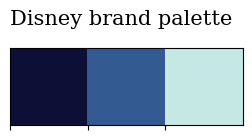

In [17]:
sns.palplot(['#0E0F37','#335B92','#C6E8E5'])

plt.title("Disney brand palette ", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

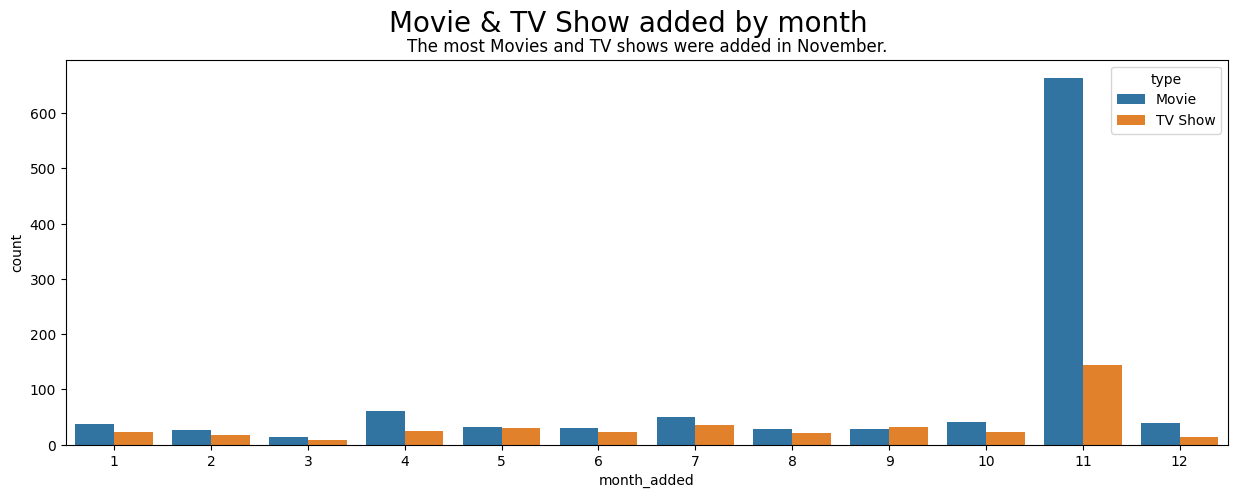

In [18]:

plt.figure(figsize=(15,5))
ax=sns.countplot(x='month_added',data=df,hue='type')
plt.suptitle('Movie & TV Show added by month',fontsize=20)
ax.set_title('The most Movies and TV shows were added in November.')
plt.show()

## **(8) - 워드 클라우드**


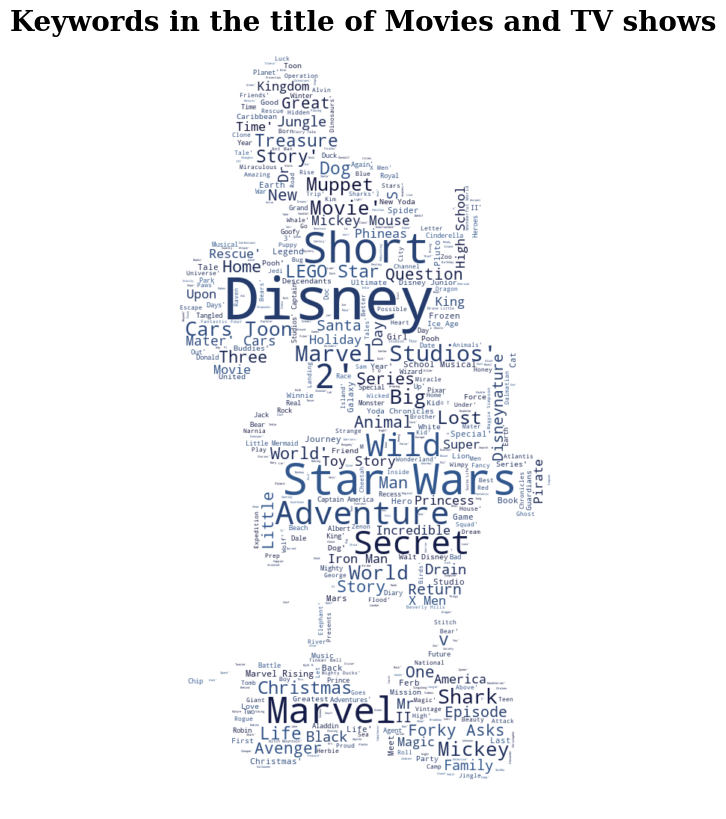

In [21]:

plt.figure(figsize=(20, 10))
text=str(list(df['title']))
mask=np.array(Image.open('/Users/parkjisook/Desktop/eda/disney/disney.jpg'))
cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", ['#0E0F37', '#335B92'])
wordcloud=WordCloud(
    background_color='white', width=1000, height=1000,
    max_words=500, mask=mask, colormap=cmap).generate(text)
plt.title('Keywords in the title of Movies and TV shows', fontweight='bold', fontfamily='serif', fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
